In [1]:
import sys
sys.path.append('../')

In [2]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, pandas_to_fits, decode_str_columns, cross_match_data_frames
import pandas as pd
from tqdm import tqdm
import numpy as np
import seaborn as sns
from astropy.coordinates import SkyCoord
import astropy.coordinates 
import astropy.units as u
import astroquery

%matplotlib inline

matplotlib settings set


matplotlib settings set


In [3]:
import astropy.io.fits as fits
import urllib.request
import os

def save_photoz_file(filename):

    #example filename = 'https://portal.nersc.gov/cfs/cosmo/data/legacysurvey/dr9/north/sweep/9.0-photo-z/sweep-170p035-180p040-pz.fits'
    sweepfileurl = 'https://portal.nersc.gov/cfs/cosmo/data/legacysurvey/dr9/north/sweep/9.0-photo-z/'+filename
    savepath = data_path+'photoz-dr9/'+filename
    #check if exists
    if os.path.isfile(savepath):
        print('File already exists')
        df = fits_to_pandas(savepath, include_data_path=False)
        return df
    else:
        try:
            urllib.request.urlretrieve(sweepfileurl, savepath)
        except:
            print('File not found', sweepfileurl)
            return None
        df = fits_to_pandas(savepath, include_data_path = False)
        return df


load DESI counterparts

In [4]:
desi = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match_xmatch.pkl')
desi.reset_index(drop=True, inplace=True)
erosita_columns = list(desi.columns.values)
desi.sample(4)

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,nway_desi_id,nway_desi_id_true_ctp,nway_Separation_EROSITA_DESI,nway_pos_err,nway_prob_has_match,nway_prob_this_match,nway_nnmag_grzw1w2,nway_nnmag_grzw1,nway_nnmag_grz,nway_n_match_flag_0,nway_n_match_flag_2,nway_is_closest,nway_is_within_pos_r98,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,GAIA_sep,GAIA_source_id,GAIA_ra,GAIA_ra_error,GAIA_dec,GAIA_dec_error,GAIA_parallax,GAIA_parallax_error,GAIA_pmra,GAIA_pmra_error,GAIA_pmdec,GAIA_pmdec_error,GAIA_phot_g_mean_flux,GAIA_phot_g_mean_flux_error,GAIA_phot_g_mean_mag,GAIA_phot_bp_mean_flux,GAIA_phot_bp_mean_flux_error,GAIA_phot_bp_mean_mag,GAIA_phot_rp_mean_flux,GAIA_phot_rp_mean_flux_error,GAIA_phot_rp_mean_mag,GAIA_bp_rp,GAIA_classprob_dsc_combmod_quasar,GAIA_classprob_dsc_combmod_galaxy,GAIA_classprob_dsc_combmod_star,GAIA_classprob_dsc_combmod_whitedwarf,GAIA_classprob_dsc_combmod_binarystar,GAIA_spectraltype_esphs,GAIA_distance_gspphot,GAIA_distance_msc,SDSS_angDist,SDSS_objID,SDSS_RA_ICRS,SDSS_DE_ICRS,SDSS_errHalfMaj,SDSS_errHalfMin,SDSS_errPosAng,SDSS_mode,SDSS_class,SDSS_clean,SDSS_e_RA_ICRS,SDSS_e_DE_ICRS,SDSS_umag,SDSS_gmag,SDSS_rmag,SDSS_imag,SDSS_zmag,SDSS_e_umag,SDSS_e_gmag,SDSS_e_rmag,SDSS_e_imag,SDSS_e_zmag,SDSS_zsp,SDSS_e_zsp,SDSS_f_zsp,SDSS_spCl,SDSS_subCl,SDSS_pmRA,SDSS_pmDE,SDSS_e_pmRA,SDSS_e_pmDE,SDSS_sigRA,SDSS_sigDE,SDSS_zph,SDSS_e_zph,SDSS_<zph>,SDSS_Q,SDSS_SDSS16,SDSS_Sp-ID,SDSS_MJD,SDSS_NAME,MILQ_sep,MILQ_RA,MILQ_DEC,MILQ_NAME,MILQ_TYPE,MILQ_RMAG,MILQ_BMAG,MILQ_COMMENT,MILQ_R,MILQ_B,MILQ_Z,MILQ_CITE,MILQ_ZCITE,MILQ_RXPCT,MILQ_QPCT,MILQ_XNAME,MILQ_RNAME,MILQ_LOBE1,MILQ_LOBE2,class_GAIA_class,class_SDSS_class,class_MILQ_class,class_final,redshift_final
531,SRGe J102640.8+560804,156.670150,56.134483,154.575056,51.158604,9.920048,9.224899,4.482496e-15,1.442127e-15,20.590950,6.624606,4196.661621,0.0,0.0,0.0,9107,7952,156.672159,56.133194,4.356345,102.657829,0.000008,6.268413e+08,6.270701e+08,0.0,0.0,0.004907,0.001579,17.862347,156.670150,56.134483,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,0,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-1,0,0,NaN,69950668099,4.356345,3.546484,5.353745,8.680896,133.843738,42.380168,3.449456e-15,6.146820e+19,9011_605981_2858,NaN,17.148241,3.191836,1.735784e-07,1.000000,0.097860,0.073097,0.225146,5,0,True,False,9011,2858,605981,156.675314,56.138279,0.321739,1.501142,3.793839,9.606547,9.356745,-3.095441,114.253540,475.04022,146.35255,56.391346,3.990081,1.014706,0.001179,0.000015,23.711596,22.045712,21.044900,20.042458,20.071497,NaN,17.355270,7.012430,18.160254,28.489521,19.189259,9.425293,-0.106271,0.436375,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [6]:
desi.query('class_final=="QSO"').head(5)[['desi_ra', 'desi_dec', 'nway_desi_id', 'desi_release',  'desi_brickid', 'desi_objid', 'class_final', 'redshift_final']]

,desi_ra,desi_dec,nway_desi_id,desi_release,desi_brickid,desi_objid,class_final,redshift_final
0,154.762154,56.504538,9011_606779_231,9011,606779,231,QSO,0.94967
1,154.769507,56.559155,9011_606779_284,9011,606779,284,QSO,1.46400
4,154.829735,56.407936,9011_606779_666,9011,606779,666,QSO,1.28400
7,154.848840,56.190528,9011_605977_2902,9011,605977,2902,QSO,0.58000
12,154.913504,56.316004,9011_605977_3469,9011,605977,3469,QSO,2.01900


In [27]:
dr9_photoz = pd.read_pickle(data_path+'photoz-dr9/photoz-dr9.gz_pkl', compression='gzip')
dr9_photoz.rename(columns={'desi_id':'nway_desi_id'}, inplace=True)
dr9_photoz.replace(-99.0, np.nan, inplace=True)


In [28]:
desi_photoz = desi.merge(dr9_photoz, on='nway_desi_id', how='left')
desi_photoz

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,nway_desi_id,nway_desi_id_true_ctp,nway_Separation_EROSITA_DESI,nway_pos_err,nway_prob_has_match,nway_prob_this_match,nway_nnmag_grzw1w2,nway_nnmag_grzw1,nway_nnmag_grz,nway_n_match_flag_0,nway_n_match_flag_2,nway_is_closest,nway_is_within_pos_r98,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,GAIA_sep,GAIA_source_id,GAIA_ra,GAIA_ra_error,GAIA_dec,GAIA_dec_error,GAIA_parallax,GAIA_parallax_error,GAIA_pmra,GAIA_pmra_error,GAIA_pmdec,GAIA_pmdec_error,GAIA_phot_g_mean_flux,GAIA_phot_g_mean_flux_error,GAIA_phot_g_mean_mag,GAIA_phot_bp_mean_flux,GAIA_phot_bp_mean_flux_error,GAIA_phot_bp_mean_mag,GAIA_phot_rp_mean_flux,GAIA_phot_rp_mean_flux_error,GAIA_phot_rp_mean_mag,GAIA_bp_rp,GAIA_classprob_dsc_combmod_quasar,GAIA_classprob_dsc_combmod_galaxy,GAIA_classprob_dsc_combmod_star,GAIA_classprob_dsc_combmod_whitedwarf,GAIA_classprob_dsc_combmod_binarystar,GAIA_spectraltype_esphs,GAIA_distance_gspphot,GAIA_distance_msc,SDSS_angDist,SDSS_objID,SDSS_RA_ICRS,SDSS_DE_ICRS,SDSS_errHalfMaj,SDSS_errHalfMin,SDSS_errPosAng,SDSS_mode,SDSS_class,SDSS_clean,SDSS_e_RA_ICRS,SDSS_e_DE_ICRS,SDSS_umag,SDSS_gmag,SDSS_rmag,SDSS_imag,SDSS_zmag,SDSS_e_umag,SDSS_e_gmag,SDSS_e_rmag,SDSS_e_imag,SDSS_e_zmag,SDSS_zsp,SDSS_e_zsp,SDSS_f_zsp,SDSS_spCl,SDSS_subCl,SDSS_pmRA,SDSS_pmDE,SDSS_e_pmRA,SDSS_e_pmDE,SDSS_sigRA,SDSS_sigDE,SDSS_zph,SDSS_e_zph,SDSS_<zph>,SDSS_Q,SDSS_SDSS16,SDSS_Sp-ID,SDSS_MJD,SDSS_NAME,MILQ_sep,MILQ_RA,MILQ_DEC,MILQ_NAME,MILQ_TYPE,MILQ_RMAG,MILQ_BMAG,MILQ_COMMENT,MILQ_R,MILQ_B,MILQ_Z,MILQ_CITE,MILQ_ZCITE,MILQ_RXPCT,MILQ_QPCT,MILQ_XNAME,MILQ_RNAME,MILQ_LOBE1,MILQ_LOBE2,class_GAIA_class,class_SDSS_class,class_MILQ_class,class_final,redshift_final,,RELEASE,BRICKID,OBJID,Z_PHOT_MEAN,Z_PHOT_MEDIAN,Z_PHOT_STD,Z_PHOT_L68,Z_PHOT_U68,Z_PHOT_L95,Z_PHOT_U95,Z_SPEC,SURVEY,TRAINING
0,SRGe J101903.3+563020,154.763934,56.505585,154.966043,50.066118,9.267930,15.858959,2.171120e-14,5.650445e-15,28.800014,7.495345,1211.871216,0.0,0.0,0.0,6207,5146,154.765943,56.504295,4.058504,102.778427,0.000023,6.268413e+08,6.270701e+08,0.0,0.0,0.023765,0.006185,7.077317,154.763934,56.505585,853324209744036352,7.576342,1,0,20.950485,-1.0,0,SDSS J101902.92+563016.4,0.949746,QSO,7.576898,1,0,0,2,16.915001,16.554001,12.382,12.1,5.0,0.7,2,1,1,1237658303814435106,9216733310671409152,7.544174,68469189470,4.058504,3.313348,5.001804,8.110237,132.352465,42.185604,1.670761e-14,1.526396e+20,9011_606779_231,NaN,5.167984,2.982013,9.581405e-01,0.992349,0.949328,0.923767,0.845811,14,0,False,True,9011,231,606779,154.762154,56.504538,3.362170,4.618722,5.989522,16.031805,20.984790,50.180990,-3.493270,435.342250,248.158630,104.400180,3.761635,0.939089,0.001432,0.000018,21.087423,20.774010,20.520338,19.482046,19.191862,18.247932,NaN,70.151200,72.758970,61.198788,31.093582,20.335644,1.898610,-0.014626,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0,0.004428,8.533242e+17,154.762155,3.899419,56.504539,4.484491,NaN,NaN,NaN,NaN,NaN,NaN,79.281657,1.895461,2

<AxesSubplot:xlabel='Z_SPEC', ylabel='Count'>

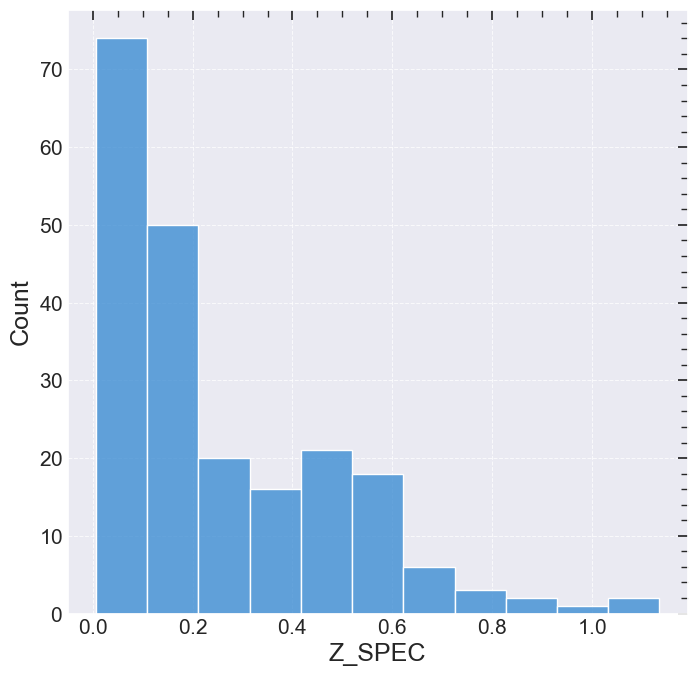

In [33]:
sns.histplot(desi_photoz.query("~Z_SPEC.isna()")['Z_SPEC'])

In [34]:
desi_test = desi_photoz.query('class_final=="QSO"')
desi_test = desi_photoz.query('class_final=="GALAXY"')

matplotlib settings set


Text(0, 0.5, 'Photoz')

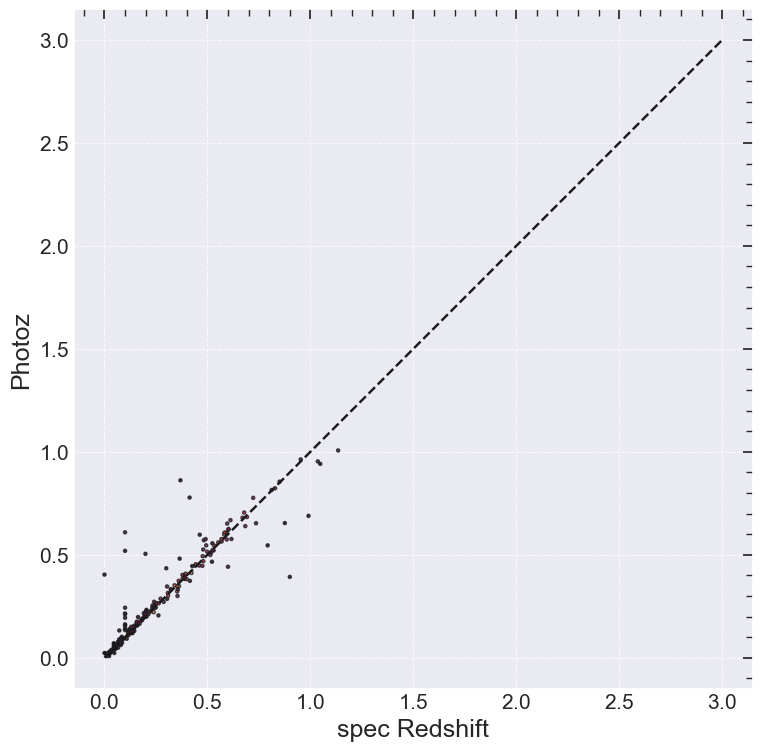

In [36]:
set_mpl()
fig,  ax =  plt.subplots( figsize = (9,9))
#sns.jointplot(data = desi_test, x = 'redshift_final', y = 'Z_PHOT_MEAN', s=5, alpha=0.8, hue = 'Z_PHOT_STD', ax = ax)
desi_test['Z_SNR'] = desi_test['Z_PHOT_MEAN']/desi_test['Z_PHOT_STD']
ax.scatter(desi_test['redshift_final'], desi_test['Z_PHOT_MEAN'], s=5, alpha=0.8, c = desi_test['Z_SNR'])
ax.plot([0,3], [0,3], 'k--')
ax.set_aspect('equal')
ax.set_xlabel('spec Redshift')
ax.set_ylabel('Photoz')


In [46]:

# # ra_min = 154.763934 -> 150
# # ra_max = 167.084550 -> 170
# # dec_min = 54.124219 -> 50
# # dec_max = 61.236185 -> 65

# #ra = 150, 160, 170
# #dec = 50, 55, 60, 65


# #sweep-150p050-160p055-pz.fits
# #sweep-160p050-170p055-pz.fits

# #sweep-150p055-160p060-pz.fits
# #sweep-160p055-170p060-pz.fits

# #sweep-150p060-160p065-pz.fits
# #sweep-160p060-170p065-pz.fits

# sweeplist = ['sweep-150p050-160p055-pz.fits', 'sweep-160p050-170p055-pz.fits', 'sweep-150p055-160p060-pz.fits', 'sweep-160p055-170p060-pz.fits', 'sweep-150p060-160p065-pz.fits', 'sweep-160p060-170p065-pz.fits']

# df_allphotoz = pd.DataFrame()
# for filename in sweeplist:
#     print(filename)
#     df = save_photoz_file(filename)
#     df['desi_id'] = df["RELEASE"].astype(str) + '_'+ df["BRICKID"].astype(str) +'_'+  df['OBJID'].astype(str)
#     df_allphotoz = pd.concat([df_allphotoz, df])
####df_allphotoz.to_pickle(data_path+'photoz-dr9/photoz-dr9.gz_pkl', compression='gzip')
# df_allphotoz


sweep-150p050-160p055-pz.fits
File already exists
sweep-160p050-170p055-pz.fits
File already exists
sweep-150p055-160p060-pz.fits
File already exists
sweep-160p055-170p060-pz.fits
File already exists
sweep-150p060-160p065-pz.fits
sweep-160p060-170p065-pz.fits
